# Comparing the difference using `mean` and `pct_50` for speeds

In [1]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime

%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [2]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [3]:
# Compare difference between mean and median speed in each segment (randomly pick 20 segments)
sql = pg.SQL('''
SELECT a.segment_id, a.datetime_bin::time AS time, 
AVG(a.segment_tt_avg_hc) AS segment_tt_avg, AVG(a.segment_tt_med_hc) AS segment_tt_med, AVG(a.data_pct_hc) AS data_pct, b.length,
b.length/avg(a.segment_tt_avg_hc) * 3.6 AS spd_avg, b.length/avg(a.segment_tt_med_hc) * 3.6 AS spd_med
FROM congestion.tt_segments_30min_v1_avg a
JOIN congestion.segments_v1 b USING (segment_id)
WHERE segment_id IN (111, 163, 200, 308, 595, 888, 1500, 2020, 2828, 3432, 4751, 5555, 6000, 6868, 7235, 8985, 9993, 10033, 10521, 11550)
GROUP BY segment_id, datetime_bin::time, b.length
''')
speeds = pandasql.read_sql(sql, con)

Text(0.5, 0.98, 'Mean vs Median Speeds')

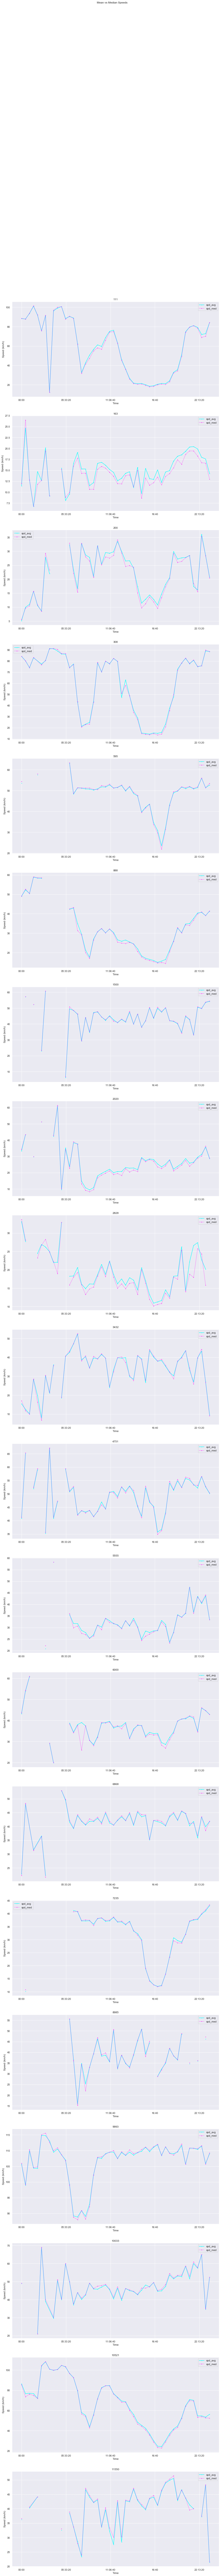

In [6]:
## P.S: have trouble fixing the x-axis to make them more uniform and tidy
segments = speeds.groupby('segment_id')
fig, ax = plt.subplots (20,1, figsize=(16,180), sharex=True)
for i, (segment_id, data) in enumerate(segments):
   
    ax[i].plot(data.time, data.spd_avg, label = 'spd_avg', marker = '+', markersize = 3, linestyle = '-', color = 'aqua')
    ax[i].plot(data.time, data.spd_med, label = 'spd_med', marker = '.', markersize = 3, linestyle = ':', color = 'magenta')
    
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Speed (km/h)')
    ax[i].set_title(segment_id)  
    ax[i].xaxis.set_tick_params(which='both', labelbottom=True)
    
fig.suptitle('Mean vs Median Speeds')